In [1]:
import pandas as pd
import sys
# Load median_forecast from Task 3
import numpy as np


In [2]:
# Import the portfolio optimization module

sys.path.append("../scripts")


from portfolio_optimization import (
   
    load_historical_data,

    forecast_prices,
    optimize_portfolio,
    plot_portfolio_performance
)

In [3]:

    # Load historical data
    tsla_data = load_historical_data("TSLA")
    bnd_data = load_historical_data("BND")
    spy_data = load_historical_data("SPY")
    
    if tsla_data is None or bnd_data is None or spy_data is None:
        raise FileNotFoundError("One or more data files are missing.")

    combined_data = pd.DataFrame({
        'TSLA': tsla_data['Close'],
        'BND': bnd_data['Close'],
        'SPY': spy_data['Close']
    }, index=tsla_data.index)

Number of columns in TSLA_data.csv: 6
Number of columns in BND_data.csv: 6
Number of columns in SPY_data.csv: 6


In [4]:
print("Combined Data Head:\n", combined_data.head())

Combined Data Head:
                  TSLA        BND         SPY
Date                                        
2015-01-05  14.433333  62.777518  171.702356
2015-01-06  14.280000  63.125810  170.316050
2015-01-07  14.318667  63.050050  170.316116
2015-01-08  14.253333  62.921385  173.206165
2015-01-09  13.998667  63.057630  173.424635


In [5]:
# Load the forecasted TSLA prices
tsla_forecast = np.load("../data/median_forecast.npy") 

In [7]:
# Forecast prices
forecast_df = forecast_prices(combined_data, tsla_forecast, bnd_growth_factor=1.5, spy_growth_factor=1.0)
print("Forecasted Prices Head:\n", forecast_df.head())

Forecasted Prices Head:
                   TSLA        BND         SPY
2025-01-31  414.929290  72.300885  606.925105
2025-02-03  415.087646  72.307393  607.250408
2025-02-04  413.795597  72.313902  607.575886
2025-02-05  413.474829  72.320411  607.901538
2025-02-06  413.939437  72.326921  608.227364


In [8]:
# Optimize portfolio
optimal_weights, portfolio_return, portfolio_volatility, sharpe_ratio, var_95 = optimize_portfolio(
        forecast_df, min_allocation=0.1, concentration_penalty=0.05
    )
# Display results
print("Optimal Weights:", optimal_weights)
print("Portfolio Return:", portfolio_return)
print("Portfolio Volatility:", portfolio_volatility)
print("Sharpe Ratio:", sharpe_ratio)
print("Value at Risk (95%):", var_95)

Annualized Returns:
 TSLA    0.219607
BND     0.022683
SPY     0.135068
dtype: float64
Covariance Matrix:
               TSLA           BND           SPY
TSLA  4.530592e-03  1.235011e-17  3.746043e-18
BND   1.235011e-17  4.465713e-30 -2.874973e-31
SPY   3.746043e-18 -2.874973e-31  4.108916e-30
Optimal Weights: [0.1 0.1 0.8]
Portfolio Return: 0.1322838419602848
Portfolio Volatility: 0.006730967337151691
Sharpe Ratio: 19.65302093060857
Value at Risk (95%): -0.00024454804214438686


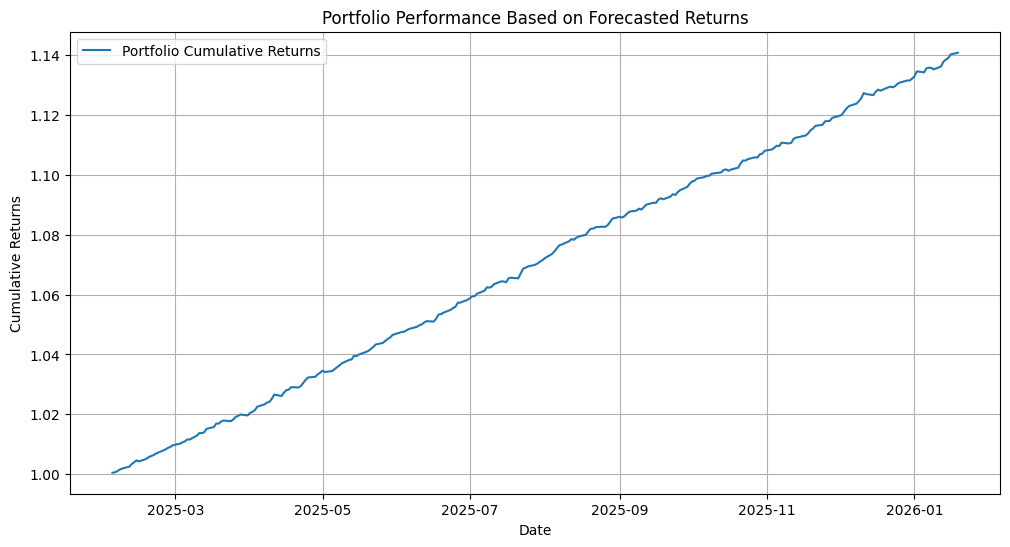

In [9]:
# Plot performance
plot_portfolio_performance(forecast_df, optimal_weights)

In [10]:
# Display results
print(f"""
    ** Optimized Portfolio Allocation **
    - TSLA: {optimal_weights[0]:.2%}
    - BND: {optimal_weights[1]:.2%}
    - SPY: {optimal_weights[2]:.2%}

    ** Portfolio Metrics **
    - Expected Annual Return: {portfolio_return:.2%}
    - Annual Volatility: {portfolio_volatility:.2%}
    - Sharpe Ratio: {sharpe_ratio:.2f}
    - Value at Risk (95%): {var_95:.2%}
    """)


    ** Optimized Portfolio Allocation **
    - TSLA: 10.00%
    - BND: 10.00%
    - SPY: 80.00%

    ** Portfolio Metrics **
    - Expected Annual Return: 13.23%
    - Annual Volatility: 0.67%
    - Sharpe Ratio: 19.65
    - Value at Risk (95%): -0.02%
    
